In [5]:
import pickle

def load_object(fn):
    with open(fn, 'rb') as file:
        return pickle.load(file)

# fn = '../_data/patient_similarities/patient_similarities.pkl'
fn = '../_data/patients/decipher_patient_sims.pkl'

patient_similarities = load_object(fn)
# patient_similarities

In [8]:
# def get_sims():
    
fl = '../_data/patients/decipher_patients_disease.pkl'

patients_disease = load_object(fl)

y = []
cos_sim = []

for patient in patient_similarities:
    for sim in patient_similarities[patient]:
        if sim =='cos_sim':
            for patient_compared in patient_similarities[patient][sim]:
                cos_sim.append(patient_similarities[patient][sim][patient_compared])
                if patients_disease[patient_compared] == patients_disease[patient]:
                    y.append(1)
                else:
                    y.append(0)

In [22]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y, cos_sim)
roc_auc = roc_auc_score(y, cos_sim)

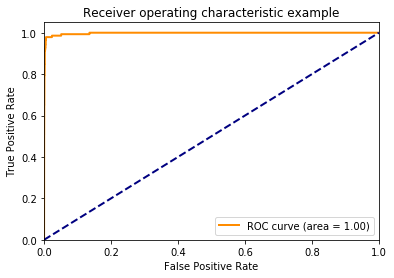

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()